# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

*This notebook was generated with the assistance of AI. Please double-check code and interpretations before drawing scientific conclusions.*

---

## Overview

This notebook provides an introduction and practical starting point for reanalyzing **Dandiset 001195**, which contains supporting data for the study:  
["Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State"](https://dandiarchive.org/dandiset/001195/0.250408.1733)

The dataset captures ex vivo patch-clamp electrophysiology and in vivo calcium imaging in mouse models, focusing on neural circuits underlying social motivation and loneliness-like states, specifically projections of dopamine neurons in the dorsal raphe nucleus (DRN).

---

## What This Notebook Covers

- A brief exploration of the Dandiset contents and structure using the DANDI API
- Streaming and inspection of an NWB file containing intracellular electrophysiological data
- Extraction and simple visualization of a current clamp response and the corresponding stimulation protocol

The goal is to help you get started working directly with NWB files in this Dandiset for your own analyses.

---

## Required Packages

You will need the following Python packages already installed:

- `dandi`
- `h5py`
- `remfile`
- `pynwb`
- `matplotlib`
- `numpy`

---

Let's get started!

In [1]:
# Import required packages
from dandi.dandiapi import DandiAPIClient
import remfile
import h5py
import pynwb
import numpy as np
import matplotlib.pyplot as plt

## Listing Files in the Dandiset

We'll use the DANDI API to connect to Dandiset 001195 and list some NWB asset file paths. This helps you select a file of interest for further exploration.

In [2]:
# Connect to the DANDI API and grab Dandiset 001195, version 0.250408.1733
dandiset_id = "001195"
dandiset_version = "0.250408.1733"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first 5 .nwb assets for a quick overview
assets = list(dandiset.get_assets())
nwb_files = [a.path for a in assets if a.path.endswith('.nwb')]

print("First 5 NWB files in this dandiset:")
for path in nwb_files[:5]:
    print(" -", path)

First 5 NWB files in this dandiset:
 - sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
 - sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb
 - sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb
 - sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb
 - sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb


## Streaming and Reading an NWB File Remotely

Let's choose an example NWB file and demonstrate how to stream it using `remfile` and open it with `h5py` and `pynwb`, avoiding a local download.

*We use `sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb` for demonstration.*

In [3]:
# Choose a sample NWB file path
sample_nwb_path = "sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb"

# Get download URL for the remote file using the DANDI API
sample_asset = next(dandiset.get_assets_by_glob(sample_nwb_path))
url = sample_asset.download_url
print("Streaming from URL:", url)

# Open as a remote file (no local download)
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')

# Open as an NWB file using pynwb
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()
print("Loaded NWB file with identifier:", nwb.identifier)

Streaming from URL: https://api.dandiarchive.org/api/dandisets/001195/versions/0.250408.1733/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/


Loaded NWB file with identifier: a18b081c-3b63-45df-b702-fc3640aef3de


## Inspecting Metadata and Experimental Context

Let's extract some key metadata from this file: subject information, genotype, anatomical target, and overall experiment context.

In [4]:
meta = {
    "Session description": nwb.session_description,
    "Experimenter": nwb.experimenter,
    "Lab": nwb.lab,
    "Institution": nwb.institution,
    "Subject ID": nwb.subject.subject_id,
    "Subject sex": nwb.subject.sex,
    "Species": nwb.subject.species,
    "Subject age": nwb.subject.age,
    "Genotype": nwb.subject.genotype,
    "Strain": nwb.subject.strain,
    "Subject description": nwb.subject.description,
    "Date of birth": nwb.subject.date_of_birth.isoformat(),
}
for k, v in meta.items():
    print(f"{k:>20s}: {v}")

cell_md = nwb.lab_meta_data["DandiIcephysMetadata"]
print("\nTargeted layer / region:", cell_md.targeted_layer)
print("Cell ID:", cell_md.cell_id)

 Session description: episodic stimulation
        Experimenter: ('Matthews, Gillian',)
                 Lab: Kay Tye Lab
         Institution: Massachusetts Institute of Technology
          Subject ID: 23
         Subject sex: F
             Species: Mus musculus
         Subject age: P302D
            Genotype: heterozygote
              Strain: DAT::Cre
 Subject description: AAV5-DIO-ChR2-eYFP into DRN
       Date of birth: 2014-05-26T00:00:00-07:00

Targeted layer / region: CeA
Cell ID: C1


## Listing Available Recordings and Stimuli

NWB files in this dandiset often contain multiple epochs of current-clamp recordings ("current_clamp-response-XX-ch-YY") and the corresponding stimulus protocols ("stimulus-XX-ch-YY").

Let's list a few: 

In [5]:
# List acquisition (recordings) and stimulus fields
acquis_keys = list(nwb.acquisition.keys())
stim_keys = list(nwb.stimulus.keys())

print("First 5 acquisition (recorded response) keys:", acquis_keys[:5])
print("First 5 stimulus (input protocol) keys:", stim_keys[:5])

First 5 acquisition (recorded response) keys: ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0']
First 5 stimulus (input protocol) keys: ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0']


## Plotting a Current Clamp Stimulus and Response

Let's plot the first episode of the current-clamp protocol, both the stimulus (injected current) and response (membrane voltage) from channel 0.

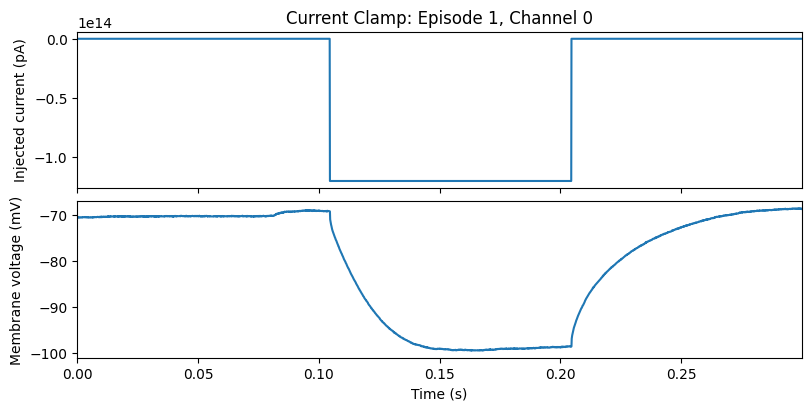

In [6]:
# Acquire and Stimulus objects for first episode and channel 0
resp0 = nwb.acquisition["current_clamp-response-01-ch-0"]
stim0 = nwb.stimulus["stimulus-01-ch-0"]

# Convert the signal to physical units using conversion factors, as data are integer types.
# For the response (volts): value = raw * conversion
# For the stimulus (amperes): data is float64, use directly.

# Time axis in seconds (sampling at 10 kHz)
t = np.arange(resp0.data.shape[0]) / resp0.rate

# Convert voltage response
v = resp0.data[:] * resp0.conversion  # volts

# Get stimulus current (amperes)
i = stim0.data[:]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,4), constrained_layout=True)
ax1.plot(t, i * 1e12)  # show in pA
ax1.set_ylabel("Injected current (pA)")
ax1.set_title("Current Clamp: Episode 1, Channel 0")

ax2.plot(t, v * 1e3)
ax2.set_ylabel("Membrane voltage (mV)")
ax2.set_xlabel("Time (s)")
ax2.set_xlim([0, t[-1]])
plt.show()

## Notes and Next Steps

- This notebook demonstrated how to list assets, stream and open NWB files, inspect metadata, and plot a basic current-clamp episode from Dandiset 001195.
- You can choose and explore other assets using the same approach, e.g., iterating over different stimulus protocols, sweeps, or cells.
- For more advanced analyses (e.g., extracting spike times, fitting passive properties, analyzing response diversity across regions), further steps and domain-specific code will be necessary.

---

We hope this serves as a foundation for your exploration of the "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" dataset!